In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading traing dataset

train = pd.read_csv("/content/train.csv")
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#loading testing dataset
test = pd.read_csv("/content/test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#Stores the dimensions of the training dataset
train.shape


(614, 13)

In [ ]:
#Stores the dimensions of the testing dataset
test.shape


(367, 12)

In [ ]:
# print the information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#checking for null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Filling Missing Values
train['Gender'].fillna(train['Gender'].mode().values[0],inplace=True)
train['Married'].fillna(train['Married'].mode().values[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode().values[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode().values[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)


In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#checking for null values
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test['Gender'].fillna(test['Gender'].mode().values[0],inplace=True)
test['Dependents'].fillna(test['Gender'].mode().values[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode().values[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(),inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.Married.replace({"Yes": 1, "No" : 0})
train.Married = train.Married.replace({"Yes": 1, "No" : 0})

train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})
train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})

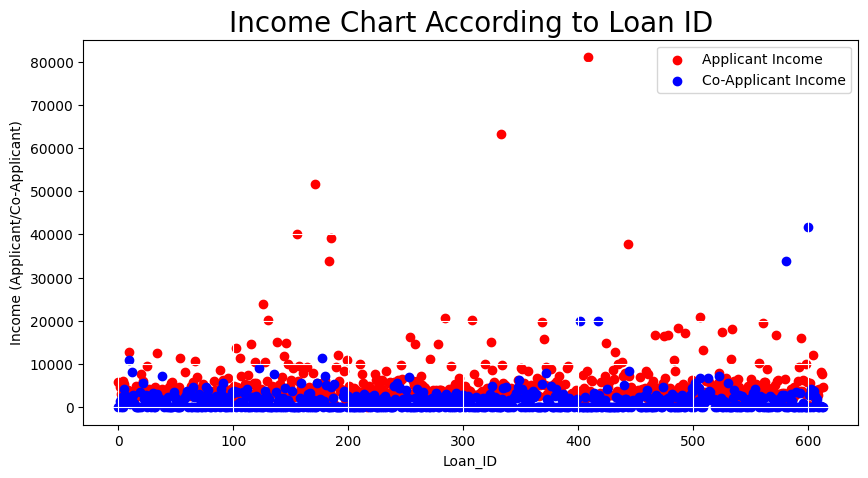

In [ ]:
#Data Visualization
plt.figure(figsize=(10, 5))
plt.scatter(train.index, train['ApplicantIncome'], color="r", label="Applicant Income")
plt.scatter(train.index, train['CoapplicantIncome'], color="b", label="Co-Applicant Income")
plt.grid(color="white")
plt.xlabel("Loan_ID")
plt.ylabel("Income (Applicant/Co-Applicant)")
plt.title("Income Chart According to Loan ID", fontsize=20)
plt.legend()
plt.show()

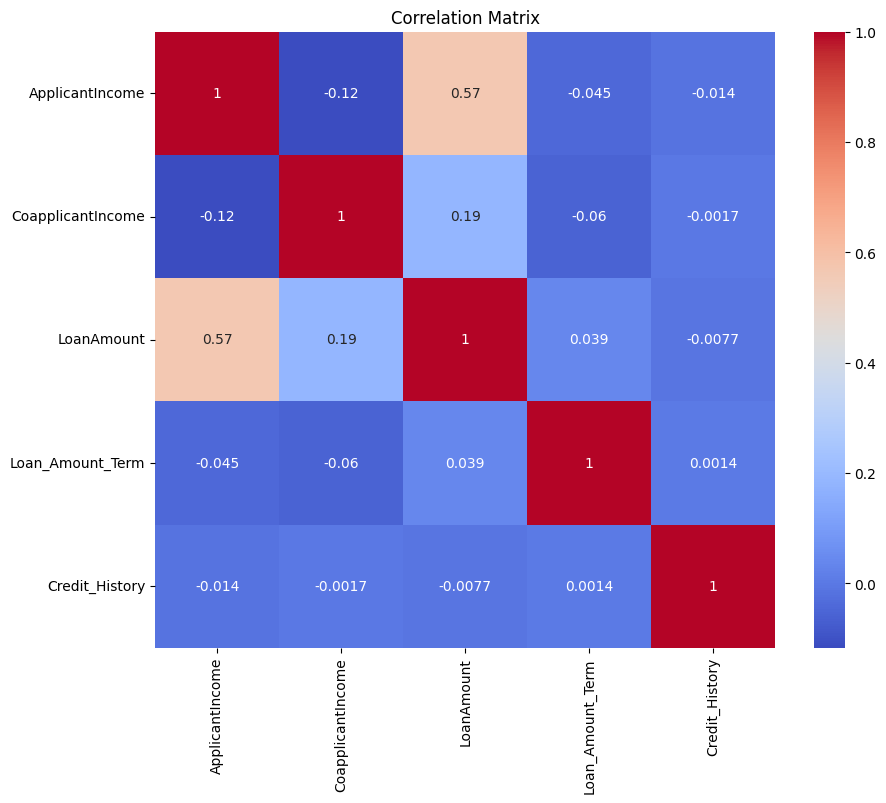

In [ ]:
## Visualize the correlation matrix using a heatmap
import seaborn as sns
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

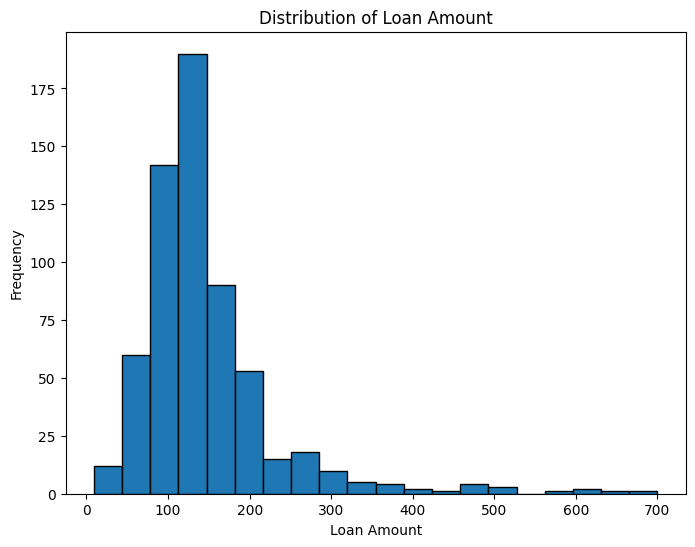

In [ ]:
# Explore the distribution of a numerical variable
plt.figure(figsize=(8, 6))
train['LoanAmount'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

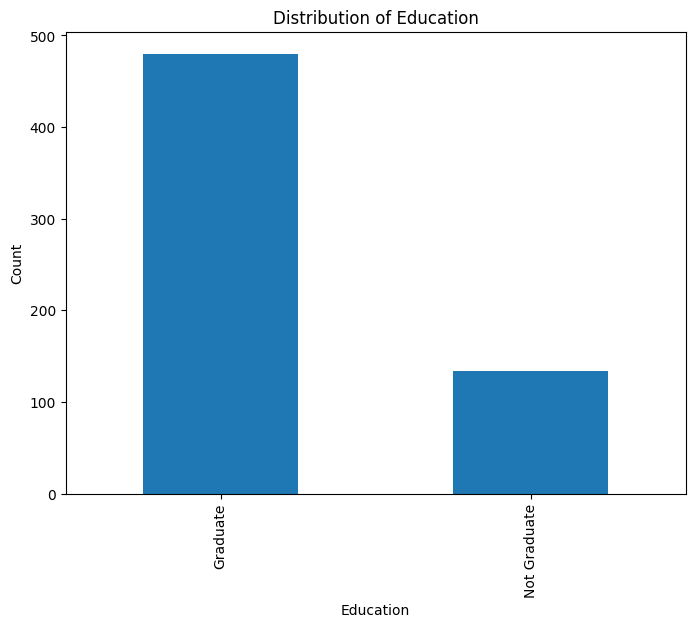

In [ ]:
# Explore the distribution of a categorical variable
plt.figure(figsize=(8, 6))
train['Education'].value_counts().plot.bar()
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [45]:
#Splitting the data into Train and Test set
x = train.iloc[1:542,1:12].values
y = train.iloc[1:542,12].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)


In [48]:
print(x_train)


[[  1.           0.           0.         ... 360.           1.
    1.        ]
 [  0.           0.           0.         ... 360.           0.84219858
    0.        ]
 [  1.           1.           3.         ... 180.           0.
    1.        ]
 ...
 [  1.           1.           2.         ... 360.           1.
    2.        ]
 [  0.           0.           1.         ... 360.           1.
    1.        ]
 [  1.           0.           0.         ... 360.           1.
    1.        ]]


In [50]:
print(x_test)

[[  1.   0.   0. ... 300.   1.   1.]
 [  1.   1.   2. ... 180.   1.   1.]
 [  1.   1.   2. ... 360.   1.   2.]
 ...
 [  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   2. ... 360.   1.   0.]
 [  1.   1.   1. ... 300.   0.   0.]]


**LogisticRegression**





In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
model = LogisticRegression()

In [55]:
#the model is being fitted to the training data
model.fit(x_train,y_train)

LogisticRegression()

In [60]:
# precdicting and Finding Accuracy
lr_prediction = model.predict(x_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.8098159509202454


In [61]:
# predict the target on the test dataset
predict_test = model.predict(x_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [62]:
# Deploy Model
import pickle as pkl



In [63]:
# save the model to disk
filename = 'logistic_model.pkl'
pkl.dump(model, open(filename, 'wb')) # wb means write as binary

**Using DecisionTree Classifier**

In [64]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [65]:
#the model is being fitted to the training data
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [67]:
#precdicting and Finding Accuracy
dt_prediction = model.predict(x_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))


Decision Tree accuracy =  0.7300613496932515


**K-Nearest Neighbors (KNN)**

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [71]:
#the model is being fitted to the training data
model.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
# precdicting and  Finding Accuracy
knn_prediction = model.predict(x_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6441717791411042


**Support Vector Machine (SVM)**

In [74]:
from sklearn import svm
model = svm.SVC()

In [75]:
#the model is being fitted to the training data
model.fit(x_train,y_train)

SVC()

In [77]:
# precdicting and  Finding Accuracy
svc_prediction = model.predict(x_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.7116564417177914


**CONCLUSION**

1.Logistic Regression accuracy:  0.8098159509202454

2.SVM accuracy: 0.7116564417177914

3.Decision Tree accuracy:  0.7300613496932515

4.KNN accuracy:  0.6441717791411042

Based on these results, we can draw some conclusions:

Logistic Regression achieved an accuracy score of approximately 0.81, which is the highest among the four models. This indicates that the LR model performed well in classifying the test instances and is the most accurate model in this case.

SVM achieved an accuracy score of approximately 0.71, which is lower than the accuracy of Logistic Regression. While SVM did not perform as well as LR, it still showed reasonable performance in classifying the test data.

Decision Tree achieved an accuracy score of approximately 0.73, which is higher than the accuracy of SVM but lower than that of Logistic Regression. This suggests that Decision Tree was able to capture some patterns in the data and performed moderately well.

KNN achieved an accuracy score of approximately 0.64, which is the lowest among the four models. This indicates that KNN may not have been the best choice for this particular dataset, as it did not perform as well in classifying the test instances.